<a href="https://colab.research.google.com/github/schumbar/CMPE258/blob/main/assignment_05/CMPE258_Assignment05_PartC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 Part C - PyTorch Classes Based
By Shawn Chumbar

## Assignment Description
Notes:
1. You must create a 3 layer neural network.
2. You must use einsum.
3. Use 3 variables based on non-linear equation.
4. Generate syntetic data using the equation you used and plot using 4-d plot in matplotlib.

Perform the following tasks:

Write a colab PyTorch classes based - 3 layer deep neural network for non-linear regression using PyTorch built-in functionality of modules, back propagation, etc.


### References Used
1. [deep_learning_fundamentals_part1.ipynb](https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing&authuser=1#scrollTo=EGkS6nN6dQaz)
2. [TensorFlow 2.0 + Keras Crash Course.ipynb](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO?authuser=1#scrollTo=KC5RgwGeBP-9)

## Setup

Import the necessary libraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Defining Neural Network Architecture

Here we define the neural network architecture using 3 hidden layers.

In [2]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

## Generating Random Data

We generate random 3-Dimensional data for non-linear regression.

In [3]:
# Generate random 3D data for non-linear regression
np.random.seed(0)
X = np.random.rand(100, 3)
y = np.sin(2 * np.pi * X[:, 0]) + np.cos(2 * np.pi * X[:, 1]) + np.tan(2 * np.pi * X[:, 2]) + np.random.normal(0, 0.1, size=(100,))

# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

### Define Hyperparameters

We define a set of hyperparameters such as **input_size, hidden_size, output_size, number of epochs**, and **learning_rate**.

In [4]:
# Hyperparameters
input_size = 3
hidden_size = 20
output_size = 1
num_epochs = 1000
learning_rate = 0.01

### Initialize Model

Here we initialize the model with the specified input_size, hidden_size, and output_size.

In [5]:
# Initialize the model
model = Net(input_size, hidden_size, output_size)

### Define loss function and optimizer

Here we define the loss function and optimizer.

In [6]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training loop

This is where we perform the training loop and print out the Epoch and Loss.

In [7]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/1000], Loss: 215.4717
Epoch [2/1000], Loss: 215.2353
Epoch [3/1000], Loss: 215.0138
Epoch [4/1000], Loss: 214.7946
Epoch [5/1000], Loss: 214.5809
Epoch [6/1000], Loss: 214.3737
Epoch [7/1000], Loss: 214.1752
Epoch [8/1000], Loss: 213.9861
Epoch [9/1000], Loss: 213.7999
Epoch [10/1000], Loss: 213.6003
Epoch [11/1000], Loss: 213.3881
Epoch [12/1000], Loss: 213.1706
Epoch [13/1000], Loss: 212.9407
Epoch [14/1000], Loss: 212.6823
Epoch [15/1000], Loss: 212.4078
Epoch [16/1000], Loss: 212.1117
Epoch [17/1000], Loss: 211.7790
Epoch [18/1000], Loss: 211.4139
Epoch [19/1000], Loss: 211.0197
Epoch [20/1000], Loss: 210.6203
Epoch [21/1000], Loss: 210.2094
Epoch [22/1000], Loss: 209.7866
Epoch [23/1000], Loss: 209.3517
Epoch [24/1000], Loss: 208.8739
Epoch [25/1000], Loss: 208.4388
Epoch [26/1000], Loss: 208.0245
Epoch [27/1000], Loss: 207.6390
Epoch [28/1000], Loss: 207.2448
Epoch [29/1000], Loss: 206.9047
Epoch [30/1000], Loss: 206.5863
Epoch [31/1000], Loss: 206.3004
Epoch [32/1000], 

### Test Trained Model

We test the trained model.

In [8]:
# Test the trained model
with torch.no_grad():
    predicted = model(X_tensor).numpy()

In [9]:
predicted

array([[ 2.08136272e+00],
       [-8.12306464e-01],
       [ 4.53978062e+00],
       [-5.93939364e-01],
       [ 9.31010187e-01],
       [-1.35910845e+00],
       [-1.11671782e+00],
       [-7.81512797e-01],
       [-2.56624269e+00],
       [ 2.02669621e+00],
       [-4.87006724e-01],
       [-1.93386745e+00],
       [-2.18098021e+00],
       [ 2.32156706e+00],
       [-7.64004767e-01],
       [-7.27840483e-01],
       [-3.60216200e-01],
       [ 1.12662172e+00],
       [-5.27139306e-02],
       [ 1.13988466e+01],
       [-2.66232073e-01],
       [ 7.50586927e-01],
       [-1.94477606e+00],
       [-1.39555514e-01],
       [ 1.01086283e+00],
       [-2.74117053e-01],
       [-5.51969957e+00],
       [-2.98376703e+00],
       [ 4.67458189e-01],
       [-4.35092402e+00],
       [ 5.03296041e+00],
       [-9.51858163e-02],
       [-3.38123894e+00],
       [-5.82508898e+00],
       [ 1.26182671e+02],
       [ 5.19988000e-01],
       [ 8.11572492e-01],
       [-9.78101635e+00],
       [-1.9

### Plot Results

This is where we plot the results.

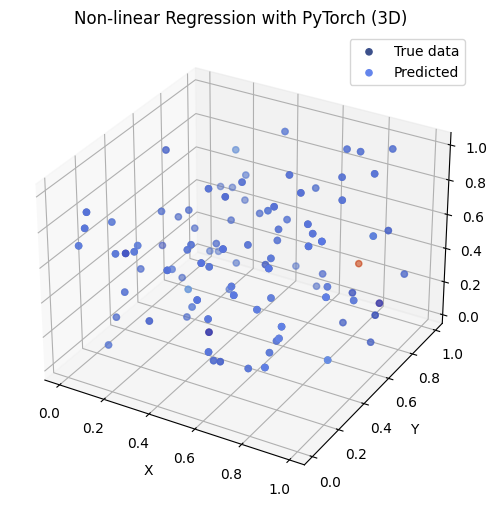

In [10]:
# Plot the results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', label='True data')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predicted.flatten(), cmap='coolwarm', label='Predicted')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Non-linear Regression with PyTorch (3D)')
ax.legend()
plt.show()